In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv('Data/train.csv')
df

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,fold,label
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0,1.0,0.0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0,1.0,0.0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0,1.0,0.0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0,1.0,0.0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0,0,0,3,0,0,2.0,2.0
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0,0,0,3,0,0,2.0,2.0
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0,0,0,3,0,0,2.0,2.0
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0,0,0,3,0,0,2.0,2.0


<Axes: >

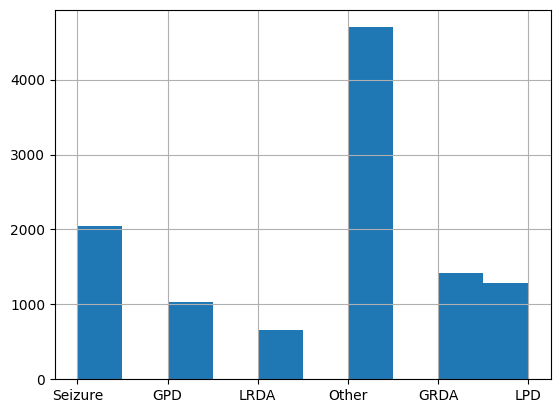

In [2]:
df= df.drop_duplicates(subset=['spectrogram_id']).reset_index(drop=True)
df['expert_consensus'].hist()

In [3]:
df['patient_id'].unique().shape

(1950,)

# spectrogram time length

  0%|          | 0/11138 [00:00<?, ?it/s]

(array([1.0993e+04, 1.1500e+02, 1.5000e+01, 5.0000e+00, 5.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 300. , 1181.6, 2063.2, 2944.8, 3826.4, 4708. , 5589.6, 6471.2,
        7352.8, 8234.4, 9116. ]),
 <BarContainer object of 10 artists>)

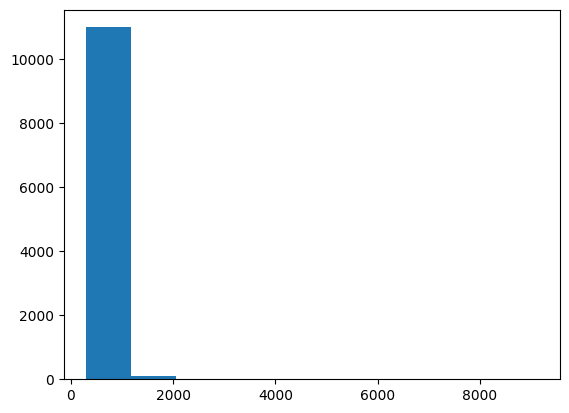

In [4]:
import glob
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

paths= glob.glob('./Data/train_spectrograms/**/*parquet', recursive=True)
length= []
for path in tqdm(paths):
    df= pd.read_parquet(path)
    length.append(len(df))
plt.hist(length)

In [5]:
import numpy as np

print('spectrogram width max: ', np.max(length))
print('spectrogram width min: ',np.min(length))
print('spectrogram width mean: ',np.mean(length))
print('spectrogram width median: ',np.median(length))
print()
print('spectrogram width Top 25%: ',np.quantile(length, 0.25))
print('spectrogram width Top 81%: ',np.quantile(length, 0.81))
print('spectrogram width Top 875%: ',np.quantile(length, 0.875))
print('spectrogram width Top 925%: ',np.quantile(length, 0.925))

spectrogram width max:  9116
spectrogram width min:  300
spectrogram width mean:  384.22571377267013
spectrogram width median:  311.0

spectrogram width Top 25%:  301.0
spectrogram width Top 81%:  400.0
spectrogram width Top 875%:  502.0
spectrogram width Top 925%:  598.0


# eeg time length

100%|███████████████████████████████████████████████████████████████████████████| 17300/17300 [01:32<00:00, 186.56it/s]


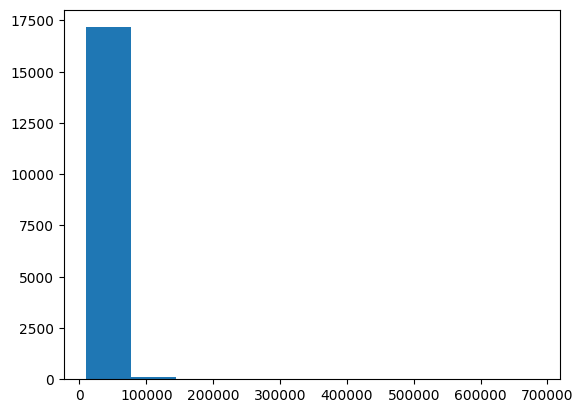

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import glob
import matplotlib.pyplot as plt

paths= glob.glob('Data/train_eegs/**/*parquet', recursive=True)
length= []
for p in tqdm(paths):
    raw= pd.read_parquet(p).T
    img= np.array(raw)
    length.append(img.shape[-1])

plt.hist(length)
plt.show()

In [2]:
import numpy as np

print('eeg width max: ', np.max(length))
print('eeg width min: ',np.min(length))
print('eeg width mean: ',np.mean(length))
print('eeg width median: ',np.median(length))
print()
print('eeg width Top 25%: ',np.quantile(length, 0.25))
print('eeg width Top 50%: ',np.quantile(length, 0.50))
print('eeg width Top 80%: ',np.quantile(length, 0.8))
print('eeg width Top 90%: ',np.quantile(length, 0.90))

eeg width max:  684400
eeg width min:  10000
eeg width mean:  16237.29479768786
eeg width median:  11600.0

eeg width Top 25%:  10000.0
eeg width Top 50%:  11600.0
eeg width Top 80%:  19200.0
eeg width Top 90%:  26000.0


# Voter distribution

<Axes: >

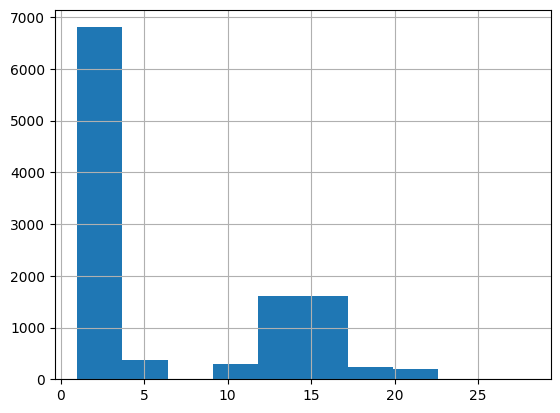

In [5]:
df= pd.read_csv('./Data/train_npy.csv')
df= df.drop_duplicates(subset=['spectrogram_id']).reset_index(drop=True)
df['voter'].hist()

In [ ]:
max_value= []
for i in range(len(df)):
    label= np.array(eval(df.loc[i, 'soft_label']))
    max_value.append(label.max())
max_value= np.array(max_value)
plt.hist(max_value)
plt.show()

# Mean, STD

In [ ]:
import pandas as pd
import glob
import numpy as np
from tqdm.auto import tqdm

paths= glob.glob('Data/train_spectrograms/**/*parquet',recursive=True)
all_mean= []
all_std= []
for p in tqdm(paths):
    df= pd.read_parquet(p).fillna(0).T.iloc[1:]
    img= df.values.reshape(-1)
    all_mean.append(img.mean())
    all_std.append(img.std())
    
all_mean= np.array(all_mean)
all_std= np.array(all_std)
print(f'mean: {all_mean.mean()}, std: {all_std.mean()}')

  0%|          | 0/11648 [00:00<?, ?it/s]

C:\Users\User\AppData\Local\Temp\ipykernel_1716\2111442631.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,j+1)


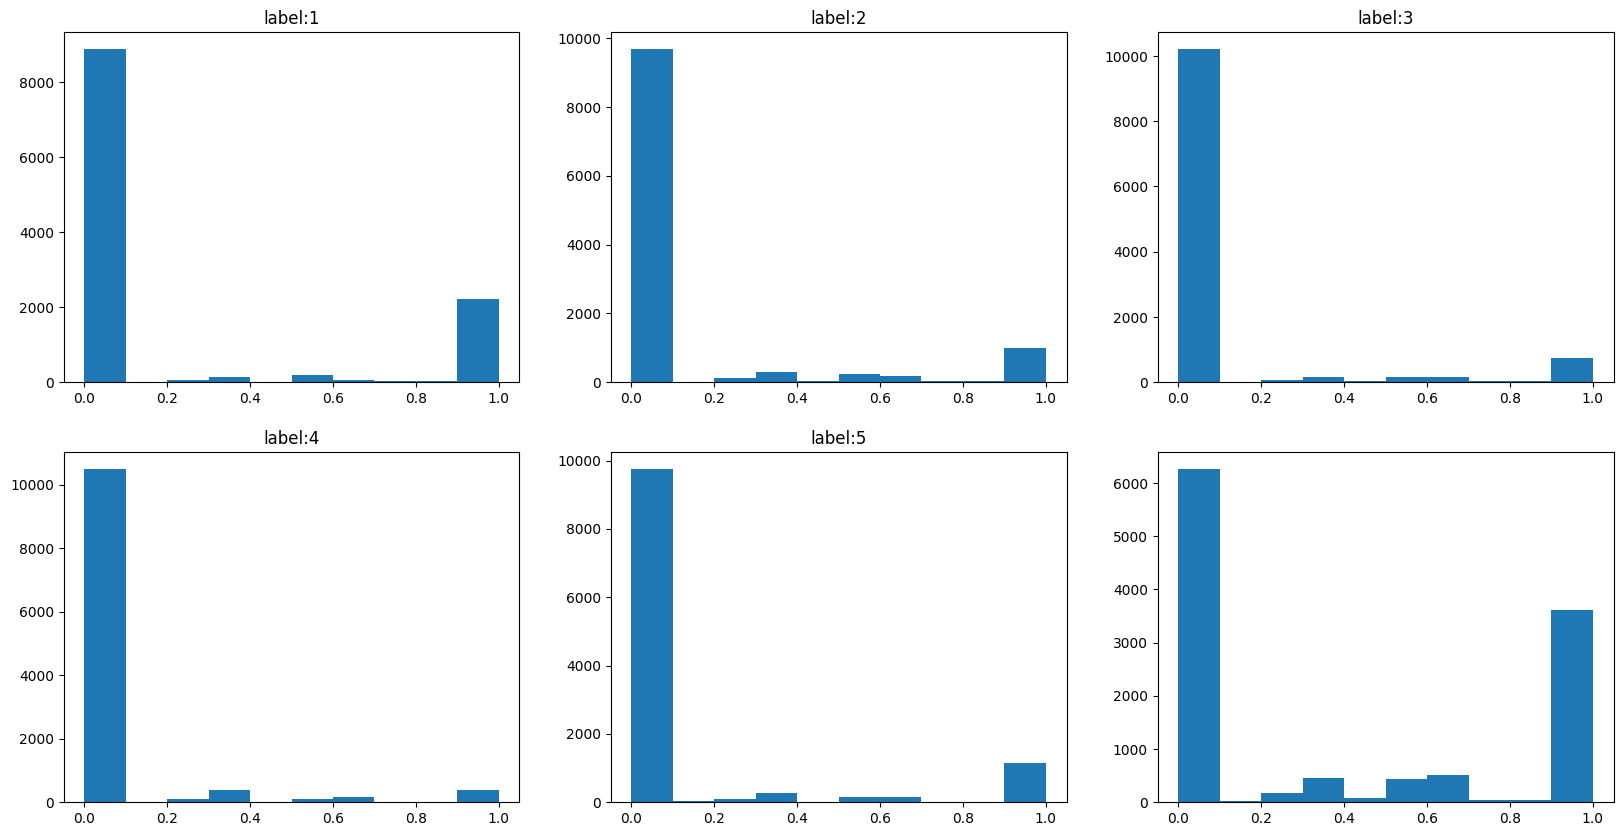

In [24]:
import pandas as pd
import glob
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

df= pd.read_csv('Data/train_npy.csv')
df= df[df['voter']<7].reset_index(drop=True)
label={
    '0': [],
    '1': [],
    '2': [],
    '3': [],
    '4': [],
    '5': [],
}
for i in tqdm(range(len(df))):
    sf_label= eval(df.loc[i,'soft_label'])
    for j in range(6):
        label[str(j)].append(sf_label[j])

plt.figure(figsize=(20,10))
for j in range(6):
    plt.title(f'label:{str(j)}')
    plt.subplot(2,3,j+1)
    plt.hist(label[str(j)])
plt.show()